# Confronto Insertion Sort vs Quicksort

Questa sezione confronta sperimentalmente gli algoritmi di ordinamento Insertion Sort e Quicksort sui casi migliore e peggiore (con liste costruite ad-hoc) e su dataset randomici. Verranno mostrati tempi di esecuzione e grafici che aiutano a confrontare le complessità teoriche con i risultati pratici.

In [1]:
import time, random, math

def insertion_sort(a):
    # in-place
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1
        while j >= 0 and a[j] > key:
            a[j+1] = a[j]
            j -= 1
        a[j+1] = key
    return a

def quicksort(a, lo=0, hi=None):
    if hi is None:
        hi = len(a)-1
    def partition(arr, l, r):
        pivot = arr[r]
        i = l - 1
        for j in range(l, r):
            if arr[j] <= pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        arr[i+1], arr[r] = arr[r], arr[i+1] # swap elementi nella scrittura di python, arr[i+1] <=> arr[r]
        return i+1
    if lo < hi:
        p = partition(a, lo, hi)
        quicksort(a, lo, p-1)
        quicksort(a, p+1, hi)
    return a


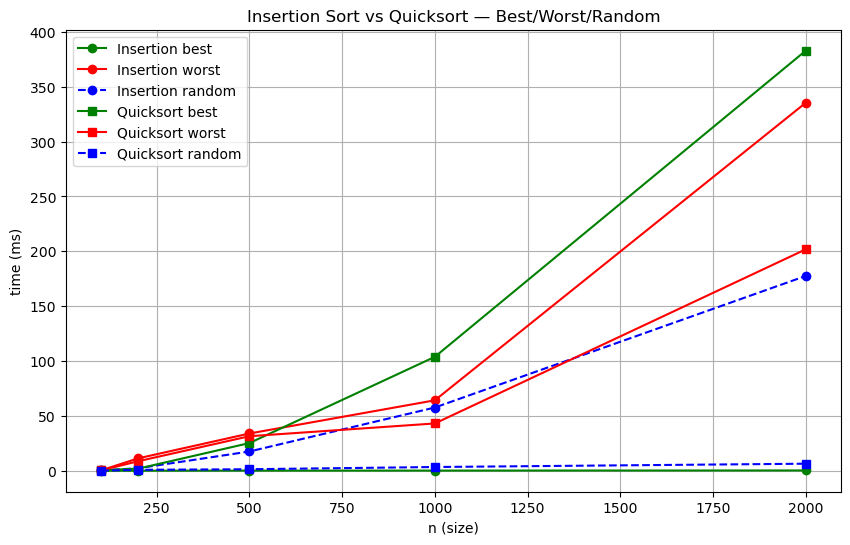

,ins_best_ms,ins_worst_ms,ins_rand_ms,qs_best_ms,qs_worst_ms,qs_rand_ms
n,,,,,,
100,0.0125,0.3824,0.256325,0.5102,0.3749,0.098375
200,0.0176,11.3032,2.294500,1.9082,8.6727,0.838025
500,0.0962,33.9537,17.543275,25.2366,31.4718,1.370900
1000,0.1343,64.2010,57.622950,103.8281,43.0981,3.394250
2000,0.2553,335.3576,177.506050,382.8484,201.7660,6.404475


In [2]:
# Benchmark: casi migliore/peggiore e random
import numpy as np
import matplotlib.pyplot as plt

# helper timing function
from time import perf_counter as now

def time_func(fn, arr):
    a = arr.copy()
    t0 = now()
    fn(a)
    t1 = now()
    return (t1 - t0) * 1000  # ms

sizes = [100, 200, 500, 1000, 2000] # dimensioni dei vari dataset

results = {
    "insertion": [],
    "quicksort": []
}

for n in sizes:
    # Caso migliore insertion -> array già ordinato
    arr_best = list(range(n))
    t_ins_best = time_func(insertion_sort, arr_best)
    t_qs_best = time_func(quicksort, arr_best)

    # Caso peggiore insertion -> array inversamente ordinato
    arr_worst = list(range(n, 0, -1)) # step = -1 così va al contrario
    t_ins_worst = time_func(insertion_sort, arr_worst)
    t_qs_worst = time_func(quicksort, arr_worst)

    # Caso random media su k ripetizioni
    k = 5
    t_ins_rand = 0.0
    t_qs_rand = 0.0
    for k in range(k):
        r = random.sample(range(0, n*3), n)
        t_ins_rand += time_func(insertion_sort, r)
        t_qs_rand += time_func(quicksort, r)
    t_ins_rand /= k
    t_qs_rand /= k

    results['insertion'].append((t_ins_best, t_ins_worst, t_ins_rand))
    results['quicksort'].append((t_qs_best, t_qs_worst, t_qs_rand))

# plotting
sizes_arr = np.array(sizes)
ins_best = np.array([x[0] for x in results['insertion']])
ins_worst = np.array([x[1] for x in results['insertion']])
ins_rand = np.array([x[2] for x in results['insertion']])
qs_best = np.array([x[0] for x in results['quicksort']])
qs_worst = np.array([x[1] for x in results['quicksort']])
qs_rand = np.array([x[2] for x in results['quicksort']])

plt.figure(figsize=(10,6))
plt.plot(sizes_arr, ins_best, 'g-o', label='Insertion best')
plt.plot(sizes_arr, ins_worst, 'r-o', label='Insertion worst')
plt.plot(sizes_arr, ins_rand, 'b--o', label='Insertion random')

plt.plot(sizes_arr, qs_best, 'g-s', label='Quicksort best')
plt.plot(sizes_arr, qs_worst, 'r-s', label='Quicksort worst')
plt.plot(sizes_arr, qs_rand, 'b--s', label='Quicksort random')

plt.xlabel('n (size)')
plt.ylabel('time (ms)')
plt.title('Insertion Sort vs Quicksort — Best/Worst/Random')
plt.legend()
plt.grid(True)
plt.show()

# print numeric summary
import pandas as pd
rows = []
for i, n in enumerate(sizes):
    rows.append({
        'n': n,
        'ins_best_ms': ins_best[i],
        'ins_worst_ms': ins_worst[i],
        'ins_rand_ms': ins_rand[i],
        'qs_best_ms': qs_best[i],
        'qs_worst_ms': qs_worst[i],
        'qs_rand_ms': qs_rand[i],
    })

pd.DataFrame(rows).set_index('n')


## Conclusione e relazione

- Complessità teoriche:
  - Insertion Sort: best O(n) (già ordinato), worst O(n^2) (inverso), average O(n^2).
  - Quicksort (pivot come ultimo elemento - Lomuto): best O(n log n) (partizionamenti bilanciati), worst O(n^2) (serie già ordinata se pivot fisso), average O(n log n).

- Cosa aspettarsi nei grafici:
  - Insertion Sort mostrerà tempi molto bassi nel caso best e una crescita quadratica nel worst/random per n grandi.
  - Quicksort mostrerà comportamento vicino a O(n log n) per random e, con la scelta pivot come ultimo elemento, può degradare a O(n^2) su array già ordinati (meglio usare pivot casuale o median-of-three in produzione).

- Suggerimenti sperimentali:
  - Per misure più accurate aumentare le dimensioni dei dataset e ripetere più volte; usare la mediana sui ripetuti per ogni n.